# PRE-PROCESSING THE DATA

In [ ]:
# -----------------------------
# STEP 1: Import required libraries
# STEP 2: Load the dataset
# -----------------------------
import pandas as pd
path = r"F:\Resume Projects\pharma-demand-prediction\data\dataset.csv"
df = pd.read_csv(path)


In [ ]:
# -----------------------------
# STEP 3: Identify symptom columns
# -----------------------------

# We know that the first column is "Disease"
# All other columns are symptom columns

symptom_columns = df.columns[1:]

In [ ]:
# -----------------------------
# STEP 4: Clean symptom text
# -----------------------------

# Why this step?
# - Symptoms may have extra spaces
# - Some values may be missing (NaN)
# - We want consistency before processing

for col in symptom_columns:
    df[col] = df[col].astype(str)      # convert everything to string
    df[col] = df[col].str.strip()      # remove leading/trailing spaces
    df[col] = df[col].replace("nan", None)  # convert 'nan' string back to None


In [ ]:
# -----------------------------
# STEP 5: Collect ALL unique symptoms
# -----------------------------

# We will go row by row and collect symptoms
# This creates the master list of all possible symptoms
all_symptoms = set()

for col in symptom_columns:
    unique_values = df[col].dropna().unique()
    for symptom in unique_values:
        all_symptoms.add(symptom)

all_symptoms

{'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic _patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sug

In [ ]:
# -----------------------------
# STEP 6: Create a new empty DataFrame
# -----------------------------

# This DataFrame will store the final transformed data
binary_df = pd.DataFrame()

# First column remains Disease
binary_df["Disease"] = df["Disease"]

binary_df

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [ ]:
# -----------------------------
# STEP 7: Create binary columns for each symptom
# -----------------------------

# For every symptom:
# - Check if it appears in ANY symptom column of the row
# - If yes → 1
# - If no  → 0

# What this does (important):
# - Looks across Symptom_1 ... Symptom_17 for each row
# - If the symptom is found anywhere → mark 1
# - Otherwise → mark 0

for symptom in sorted(all_symptoms):

    binary_df[symptom] = df[symptom_columns].apply(
        lambda row: 1 if symptom in row.values else 0,
        axis=1
    )

C:\Users\User\AppData\Local\Temp\ipykernel_16588\3701362748.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary_df[symptom] = df[symptom_columns].apply(
C:\Users\User\AppData\Local\Temp\ipykernel_16588\3701362748.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary_df[symptom] = df[symptom_columns].apply(
C:\Users\User\AppData\Local\Temp\ipykernel_16588\3701362748.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

In [ ]:
# -----------------------------
# STEP 8: Remove duplicate rows (if any)
# -----------------------------

# Duplicate records can bias analysis and models
binary_df = binary_df.drop_duplicates()

In [10]:
binary_df

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
403,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
405,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
406,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# -----------------------------
# STEP 9: Save the transformed dataset
# -----------------------------

binary_df.to_csv("disease_symptom_binary_dataset.csv", index=False)

In [12]:
# -----------------------------
# STEP 10: Quick sanity check
# -----------------------------

print("Original shape:", df.shape)
print("Transformed shape:", binary_df.shape)

print("\nSample of transformed data:")
print(binary_df.head())

Original shape: (4920, 18)
Transformed shape: (304, 132)

Sample of transformed data:
            Disease  abdominal_pain  abnormal_menstruation  acidity  \
0  Fungal infection               0                      0        0   
1  Fungal infection               0                      0        0   
2  Fungal infection               0                      0        0   
3  Fungal infection               0                      0        0   
4  Fungal infection               0                      0        0   

   acute_liver_failure  altered_sensorium  anxiety  back_pain  belly_pain  \
0                    0                  0        0          0           0   
1                    0                  0        0          0           0   
2                    0                  0        0          0           0   
3                    0                  0        0          0           0   
4                    0                  0        0          0           0   

   blackheads  ...  vomi


# EDA STAGE 1: DATASET SANITY CHECK


In [39]:
import pandas as pd
df = pd.read_csv(path)

In [40]:
# -------------------------------
# 3. Check basic structure of the dataset
# -------------------------------

# Display first 5 rows to visually inspect data
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_

In [41]:
# Check number of rows and columns
print("\nDataset Shape (Rows, Columns):")
print(df.shape)


Dataset Shape (Rows, Columns):
(4920, 18)


In [42]:
# -------------------------------
# 4. Check column names
# -------------------------------

print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [43]:
# Check for leading/trailing spaces in column names
print("\nChecking for extra spaces in column names:")
for col in df.columns:
    if col != col.strip():
        print(f"Extra spaces found in column name: '{col}'")


Checking for extra spaces in column names:


In [44]:
# -------------------------------
# 5. Check data types of each column
# -------------------------------

print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object


In [45]:
# -------------------------------
# 6. Check missing values
# -------------------------------

# Count missing values per column
print("\nMissing Values Count per Column:")
print(df.isnull().sum())


Missing Values Count per Column:
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [46]:
# Percentage of missing values per column
print("\nMissing Values Percentage per Column:")
print((df.isnull().sum() / len(df)) * 100)


Missing Values Percentage per Column:
Disease        0.000000
Symptom_1      0.000000
Symptom_2      0.000000
Symptom_3      0.000000
Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64


In [47]:
# -------------------------------
# 7. Check duplicate rows
# -------------------------------

# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 4616


In [48]:
# -------------------------------
# 8. Check unique disease labels
# -------------------------------

print("\nNumber of unique diseases:")
print(df['Disease'].nunique())

print("\nList of unique diseases:")
print(df['Disease'].unique())


Number of unique diseases:
41

List of unique diseases:
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [49]:
# -------------------------------
# 9. Check for missing disease values
# -------------------------------

missing_disease_count = df['Disease'].isnull().sum()
print(f"\nNumber of rows with missing Disease value: {missing_disease_count}")



Number of rows with missing Disease value: 0


In [50]:
# -------------------------------
# 10. Basic validation of symptom columns
# -------------------------------

# Identify symptom columns
symptom_columns = [col for col in df.columns if col.startswith("Symptom_")]

print("\nNumber of Symptom Columns:", len(symptom_columns))
print("Symptom Columns:", symptom_columns)


Number of Symptom Columns: 17
Symptom Columns: ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [51]:
# Check unique values in one sample symptom column
print("\nSample unique values from Symptom_1:")
print(df['Symptom_1'].unique())


Sample unique values from Symptom_1:
['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat' ' fatigue' ' weight_loss' ' sunken_eyes' ' cough'
 ' headache' ' chest_pain' ' back_pain' ' weakness_in_limbs' ' chills'
 ' joint_pain' ' yellowish_skin' ' constipation'
 ' pain_during_bowel_movements' ' breathlessness' ' cramps' ' weight_gain'
 ' mood_swings' ' neck_pain' ' muscle_weakness' ' stiff_neck'
 ' pus_filled_pimples' ' burning_micturition' ' bladder_discomfort'
 ' high_fever']



# EDA STAGE 2: Disease Distribution Analysis


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Count number of patients per disease
disease_counts = df['Disease'].value_counts()

print("Disease Frequency Table:")
print(disease_counts)

Disease Frequency Table:
Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                

In [53]:
# ----------------------------------------
# 2. Basic statistics on disease distribution
# ----------------------------------------

print("\nTotal number of diseases:", df['Disease'].nunique())
print("Most common disease count:", disease_counts.max())
print("Least common disease count:", disease_counts.min())


Total number of diseases: 41
Most common disease count: 120
Least common disease count: 120


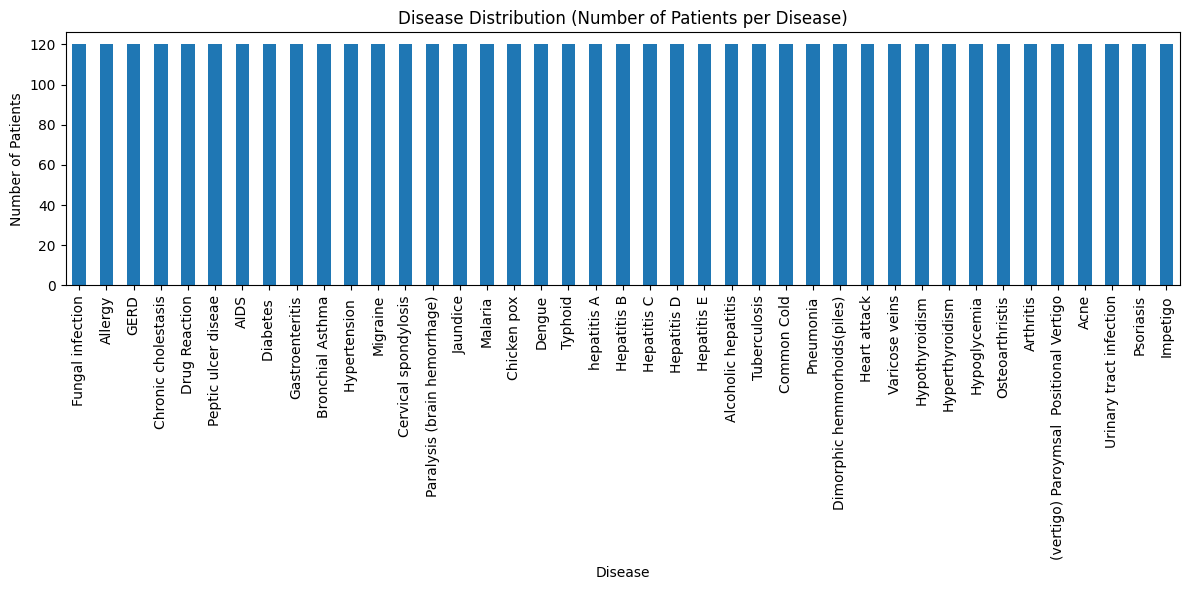

In [54]:
# ----------------------------------------
# 3. Visualize disease distribution
# ----------------------------------------

plt.figure(figsize=(12, 6))
disease_counts.plot(kind='bar')

plt.title("Disease Distribution (Number of Patients per Disease)")
plt.xlabel("Disease")
plt.ylabel("Number of Patients")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# EDA STAGE 3: Symptom Frequency Analysis


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# 1. Identify symptom columns
# ----------------------------------------

# All columns that start with 'Symptom_' are symptom fields
symptom_cols = [col for col in df.columns if col.startswith("Symptom_")]
symptom_cols
print("Number of symptom columns:", len(symptom_cols))

Number of symptom columns: 17


In [58]:
# ----------------------------------------
# 2. Convert symptom text into a single list
# ----------------------------------------

# Stack all symptom columns into one column
# This lets us count how often each symptom appears across all patients
all_symptoms = df[symptom_cols].stack()

In [59]:
# Remove missing values (patients may not have all 17 symptoms)
all_symptoms = all_symptoms.dropna()

In [60]:
# ----------------------------------------
# 3. Count frequency of each symptom
# ----------------------------------------

symptom_counts = all_symptoms.value_counts()

print("\nTop 10 most common symptoms:")
print(symptom_counts.head(10))

print("\nTotal unique symptoms:", symptom_counts.shape[0])


Top 10 most common symptoms:
fatigue              1932
vomiting             1914
high_fever           1362
loss_of_appetite     1152
nausea               1146
headache             1134
abdominal_pain       1032
yellowish_skin        912
yellowing_of_eyes     816
chills                798
Name: count, dtype: int64

Total unique symptoms: 131


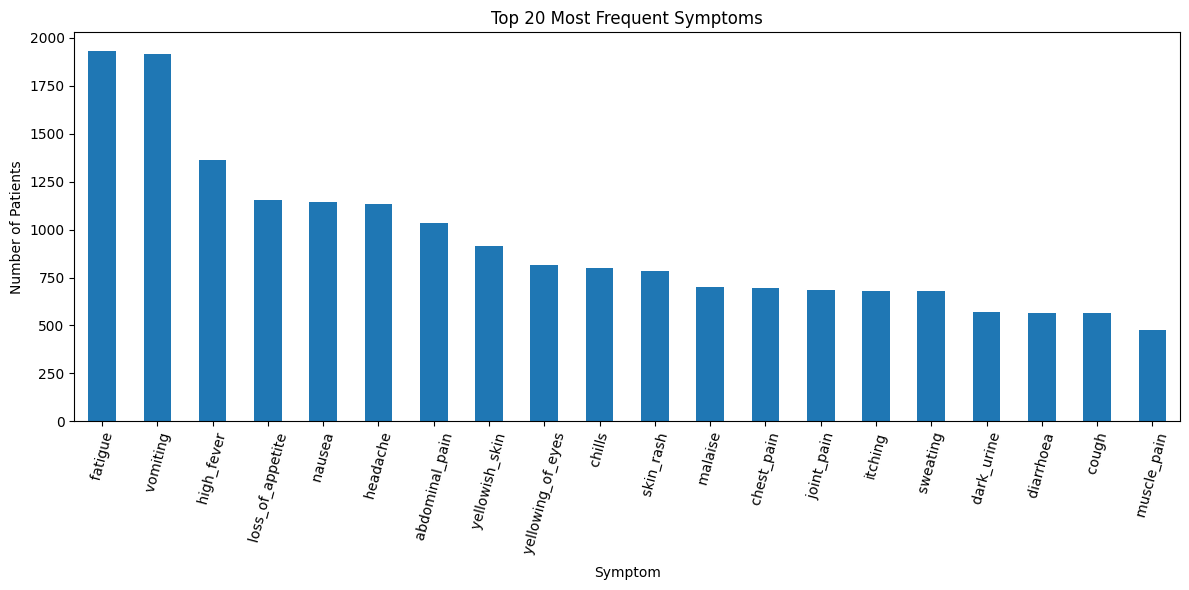

In [62]:
#-----------------------------------------
# 4. Visualize symptom frequency (Top 20)
# ----------------------------------------

plt.figure(figsize=(12, 6))
symptom_counts.head(20).plot(kind='bar')

plt.title("Top 20 Most Frequent Symptoms")
plt.xlabel("Symptom")
plt.ylabel("Number of Patients")
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

# EDA STAGE 4: Disease–Symptom Relationship


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# 1. Identify symptom columns
# ----------------------------------------
symptom_cols = [col for col in df.columns if col.startswith("Symptom_")]

In [64]:
# ----------------------------------------
# 2. Reshape data to long format
#    (Disease | Symptom)
# ----------------------------------------
# This converts Symptom_1..17 into a single 'Symptom' column
long_df = df.melt(
    id_vars=['Disease'],
    value_vars=symptom_cols,
    value_name='Symptom'
)

# Remove missing symptoms
long_df = long_df.dropna(subset=['Symptom'])

In [65]:
# ----------------------------------------
# 3. Count how often each symptom appears per disease
# ----------------------------------------
disease_symptom_counts = (
    long_df
    .groupby(['Disease', 'Symptom'])
    .size()
    .reset_index(name='Count')
)

print("Sample of Disease–Symptom counts:")
print(disease_symptom_counts.head(10))

Sample of Disease–Symptom counts:
                                   Disease                  Symptom  Count
0  (vertigo) Paroymsal  Positional Vertigo                 headache    114
1  (vertigo) Paroymsal  Positional Vertigo          loss_of_balance    114
2  (vertigo) Paroymsal  Positional Vertigo                   nausea    114
3  (vertigo) Paroymsal  Positional Vertigo       spinning_movements    108
4  (vertigo) Paroymsal  Positional Vertigo             unsteadiness    114
5  (vertigo) Paroymsal  Positional Vertigo                 vomiting    114
6                                     AIDS   extra_marital_contacts    108
7                                     AIDS               high_fever    114
8                                     AIDS           muscle_wasting    108
9                                     AIDS        patches_in_throat    108


In [66]:
# ----------------------------------------
# 4. For each disease, find top 5 symptoms
# ----------------------------------------
top_symptoms_per_disease = (
    disease_symptom_counts
    .sort_values(['Disease', 'Count'], ascending=[True, False])
    .groupby('Disease')
    .head(5)
)

print("\nTop 5 symptoms per disease:")
print(top_symptoms_per_disease)


Top 5 symptoms per disease:
                                     Disease             Symptom  Count
0    (vertigo) Paroymsal  Positional Vertigo            headache    114
1    (vertigo) Paroymsal  Positional Vertigo     loss_of_balance    114
2    (vertigo) Paroymsal  Positional Vertigo              nausea    114
4    (vertigo) Paroymsal  Positional Vertigo        unsteadiness    114
5    (vertigo) Paroymsal  Positional Vertigo            vomiting    114
..                                       ...                 ...    ...
315                              hepatitis A          mild_fever    120
316                              hepatitis A         muscle_pain    120
319                              hepatitis A   yellowing_of_eyes    120
310                              hepatitis A      abdominal_pain    114
311                              hepatitis A          dark_urine    114

[197 rows x 3 columns]


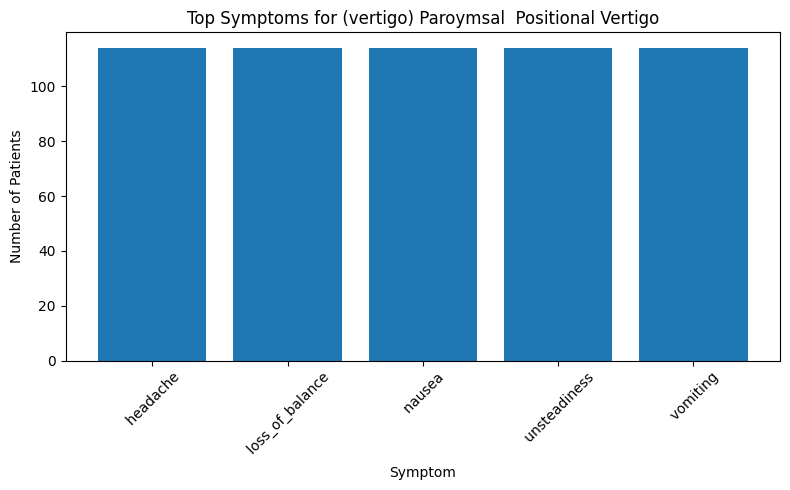

In [67]:
# ----------------------------------------
# 5. Visualize top symptoms for ONE disease (example)
# ----------------------------------------
# Choose a disease to inspect (change name as needed)
disease_name = top_symptoms_per_disease['Disease'].iloc[0]

plot_data = top_symptoms_per_disease[
    top_symptoms_per_disease['Disease'] == disease_name
]

plt.figure(figsize=(8, 5))
plt.bar(plot_data['Symptom'], plot_data['Count'])

plt.title(f"Top Symptoms for {disease_name}")
plt.xlabel("Symptom")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# EDA STAGE 5: Data Cleaning Decisions


In [68]:
import pandas as pd
# ----------------------------------------
# 1. Remove rows with missing Disease
# ----------------------------------------
df = df.dropna(subset=['Disease'])

In [69]:
# ----------------------------------------
# 2. Remove duplicate patient records
# ----------------------------------------
df = df.drop_duplicates()


In [70]:
#----------------------------------------
# 3. Clean text in Disease column
#    (remove leading/trailing spaces, standardize case)
# ----------------------------------------
df['Disease'] = df['Disease'].str.strip()


In [71]:
# ----------------------------------------
# 4. Clean text in Symptom columns
# ----------------------------------------
symptom_cols = [col for col in df.columns if col.startswith("Symptom_")]

for col in symptom_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace('nan', pd.NA)

In [72]:
# ----------------------------------------
# 5. Final sanity check
# ----------------------------------------
print("Final dataset shape:", df.shape)
print("Missing Disease values:", df['Disease'].isnull().sum())
print("Total duplicate rows:", df.duplicated().sum())

Final dataset shape: (304, 18)
Missing Disease values: 0
Total duplicate rows: 0


In [73]:
df.to_csv("disease_symptom_binary_dataset_after_EDA.csv", index=False)


# Feature Engineering: Binary Symptom Encoding


In [75]:
import pandas as pd

# Load cleaned raw dataset (output of EDA Stage 5)
path = r"F:\Resume Projects\pharma-demand-prediction\notebooks\disease_symptom_binary_dataset_after_EDA.csv"

dd = pd.read_csv(path)

# Identify symptom columns
symptom_cols = [col for col in dd.columns if col.startswith("Symptom_")]

In [76]:
# ----------------------------------------
# 1. Get list of all unique symptoms
# ----------------------------------------

all_symptoms = pd.unique(dd[symptom_cols].values.ravel())
all_symptoms = [s for s in all_symptoms if pd.notna(s)]

print("Total unique symptoms:", len(all_symptoms))

Total unique symptoms: 131


In [77]:
# ----------------------------------------
# 2. Create binary columns for each symptom
# ----------------------------------------

for symptom in all_symptoms:
    dd[symptom] = dd[symptom_cols].isin([symptom]).any(axis=1).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_16588\1405681481.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dd[symptom] = dd[symptom_cols].isin([symptom]).any(axis=1).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_16588\1405681481.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dd[symptom] = dd[symptom_cols].isin([symptom]).any(axis=1).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_16588\1405681481.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

In [78]:
# ----------------------------------------
# 3. Keep only Disease + binary symptom columns
# ----------------------------------------

binary_df = dd[['Disease'] + all_symptoms]

In [79]:
# ----------------------------------------
# 4. Save final binary dataset
# ----------------------------------------

binary_df.to_csv("disease_symptom_binary_dataset.csv", index=False)

print("Binary symptom dataset created successfully.")
print("Final shape:", binary_df.shape)

Binary symptom dataset created successfully.
Final shape: (304, 132)


# Post-Engineering EDA: Validation

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the engineered binary dataset
path = r"F:\Resume Projects\pharma-demand-prediction\notebooks\disease_symptom_binary_dataset.csv"
encoded_data = pd.read_csv(path)

In [81]:
# ----------------------------------------
# 1. Basic structure check
# ----------------------------------------

print("Shape (rows, columns):", encoded_data.shape)
print("\nFirst 5 rows:")
print(encoded_data.head())

Shape (rows, columns): (304, 132)

First 5 rows:
            Disease  itching  skin_rash  nodal_skin_eruptions  \
0  Fungal infection        1          1                     1   
1  Fungal infection        0          1                     1   
2  Fungal infection        1          0                     1   
3  Fungal infection        1          1                     0   
4  Fungal infection        1          1                     1   

   dischromic _patches  continuous_sneezing  shivering  chills  \
0                    1                    0          0       0   
1                    1                    0          0       0   
2                    1                    0          0       0   
3                    1                    0          0       0   
4                    0                    0          0       0   

   watering_from_eyes  stomach_pain  ...  bladder_discomfort  \
0                   0             0  ...                   0   
1                   0             0

In [82]:
# ----------------------------------------
# 2. Validate binary values (must be only 0 or 1)
# ----------------------------------------

binary_columns = encoded_data.columns.drop("Disease")

invalid_values = {
    col: encoded_data[col].unique()
    for col in binary_columns
    if not set(encoded_data[col].unique()).issubset({0, 1})
}

print("\nColumns with invalid binary values (should be empty):")
print(invalid_values)



Columns with invalid binary values (should be empty):
{}


In [83]:
# ----------------------------------------
# 3. Check symptom presence per patient
# ----------------------------------------

# Count how many symptoms each patient has
encoded_data["symptom_count_per_patient"] = encoded_data[binary_columns].sum(axis=1)

print("\nSymptom count statistics per patient:")
print(encoded_data["symptom_count_per_patient"].describe())



Symptom count statistics per patient:
count    304.000000
mean       7.648026
std        3.602043
min        3.000000
25%        5.000000
50%        7.000000
75%       10.000000
max       17.000000
Name: symptom_count_per_patient, dtype: float64


In [84]:
# ----------------------------------------
# 4. Check symptom frequency across all patients
# ----------------------------------------

symptom_totals = encoded_data[binary_columns].sum().sort_values(ascending=False)

print("\nTop 10 most frequent symptoms (binary data):")
print(symptom_totals.head(10))



Top 10 most frequent symptoms (binary data):
fatigue              134
vomiting             117
high_fever            89
loss_of_appetite      81
nausea                77
headache              74
abdominal_pain        70
yellowish_skin        61
yellowing_of_eyes     58
malaise               53
dtype: int64


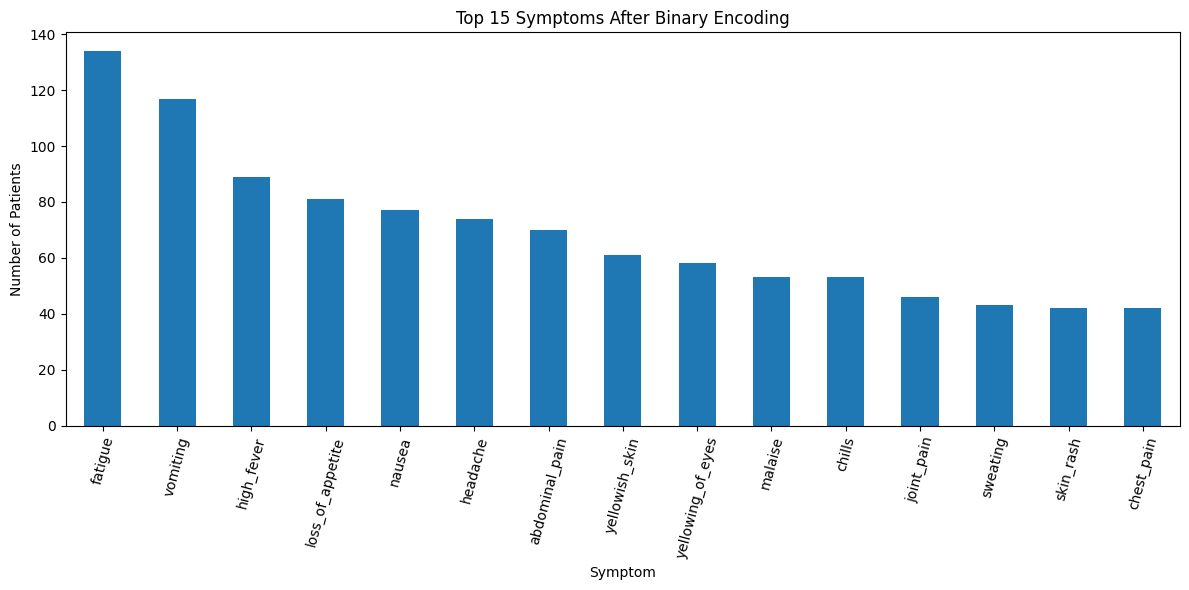

In [85]:
# ----------------------------------------
# 5. Visualize symptom frequency (Top 15)
# ----------------------------------------

plt.figure(figsize=(12, 6))
symptom_totals.head(15).plot(kind="bar")

plt.title("Top 15 Symptoms After Binary Encoding")
plt.xlabel("Symptom")
plt.ylabel("Number of Patients")
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()


# Model 1: Baseline Classifier
# Multinomial Logistic Regression

In [90]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 16.4 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/8.0 MB 9.2 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 8.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 7.3 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 6.7 MB/s  0:00:01
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   - -------------------------------------- 1.3/36.3 MB 6.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/36.3 MB 6.7 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/36.3 MB 6.9 MB/s eta 0:00:05
   ------ --------------------------------- 5.8/36.3 MB 7.2 MB/s eta 0:00:05
   -------- ------------------------------- 7.3/36.3 MB 7.3 MB/s eta 0:00:04
   --------- ---------

In [101]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [102]:
# ----------------------------------------
# 1. Load engineered dataset
# ----------------------------------------

model_input_data = pd.read_csv("disease_symptom_binary_dataset.csv")

In [103]:
# ----------------------------------------
# 2. Separate features and target
# ----------------------------------------

X_features = model_input_data.drop(columns=["Disease"])
y_target = model_input_data["Disease"]

In [104]:
# ----------------------------------------
# 3. Train-test split (stratified)
# ----------------------------------------
# Stratification preserves disease distribution

X_train, X_test, y_train, y_test = train_test_split(
    X_features,
    y_target,
    test_size=0.2,
    random_state=42,
    stratify=y_target
)

In [106]:
# ----------------------------------------
# 4. Initialize baseline model
# ----------------------------------------

baseline_model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

In [107]:
# ----------------------------------------
# 5. Train the model
# ----------------------------------------

baseline_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [108]:
# ----------------------------------------
# 6. Make predictions
# ----------------------------------------

y_predictions = baseline_model.predict(X_test)

In [109]:
# ----------------------------------------
# 7. Evaluate performance
# ----------------------------------------

print("Baseline Model Accuracy:")
print(accuracy_score(y_test, y_predictions))

print("\nClassification Report:")
print(classification_report(y_test, y_predictions))

Baseline Model Accuracy:
1.0

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Cold       1.00     

# Model 2: Comparative Classifier
# Decision Tree

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [111]:
# ----------------------------------------
# 1. Load engineered dataset
# ----------------------------------------

tree_data = pd.read_csv("disease_symptom_binary_dataset.csv")

# ----------------------------------------
# 2. Split features and target
# ----------------------------------------

feature_matrix = tree_data.drop(columns=["Disease"])
target_labels = tree_data["Disease"]

In [112]:
# ----------------------------------------
# 3. Stratified train-test split
# ----------------------------------------

X_tr, X_te, y_tr, y_te = train_test_split(
    feature_matrix,
    target_labels,
    test_size=0.2,
    random_state=42,
    stratify=target_labels
)


In [113]:
# ----------------------------------------
# 4. Initialize Decision Tree
# ----------------------------------------
# max_depth limits overfitting
# class_weight='balanced' handles disease imbalance

tree_model = DecisionTreeClassifier(
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

In [114]:
# ----------------------------------------
# 5. Train model
# ----------------------------------------

tree_model.fit(X_tr, y_tr)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [115]:
# ----------------------------------------
# 6. Predict
# ----------------------------------------

tree_predictions = tree_model.predict(X_te)

In [116]:
# ----------------------------------------
# 7. Evaluate
# ----------------------------------------

print("Decision Tree Accuracy:")
print(accuracy_score(y_te, tree_predictions))

print("\nDecision Tree Classification Report:")
print(classification_report(y_te, tree_predictions))

Decision Tree Accuracy:
0.22950819672131148

Decision Tree Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.02      1.00      0.04         1
                                   AIDS       0.00      0.00      0.00         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       0.00      0.00      0.00         2
                                Allergy       0.00      0.00      0.00         1
                              Arthritis       0.00      0.00      0.00         1
                       Bronchial Asthma       0.00      0.00      0.00         1
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       0.00      0.00      0.00         2
                    Chronic cholestasis       0.00      0.00      0.00         2
                          

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

# Model 3: Random Forest Classifier

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [118]:
# ----------------------------------------
# 1. Load engineered dataset
# ----------------------------------------

forest_data = pd.read_csv("disease_symptom_binary_dataset.csv")

# ----------------------------------------
# 2. Define features and target
# ----------------------------------------

X_inputs = forest_data.drop(columns=["Disease"])
y_outputs = forest_data["Disease"]

In [119]:
# ----------------------------------------
# 3. Stratified train-test split
# ----------------------------------------

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_inputs,
    y_outputs,
    test_size=0.2,
    random_state=42,
    stratify=y_outputs
)

In [120]:
# ----------------------------------------
# 4. Initialize Random Forest
# ----------------------------------------
# n_estimators = number of trees
# class_weight='balanced' handles imbalance

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)


In [121]:
# ----------------------------------------
# 5. Train the model
# ----------------------------------------

rf_model.fit(X_train_rf, y_train_rf)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [122]:
# ----------------------------------------
# 6. Make predictions
# ----------------------------------------

rf_predictions = rf_model.predict(X_test_rf)

In [123]:
# ----------------------------------------
# 7. Evaluate performance
# ----------------------------------------

print("Random Forest Accuracy:")
print(accuracy_score(y_test_rf, rf_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_rf, rf_predictions))

Random Forest Accuracy:
1.0

Random Forest Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Cold   

# Model 4: Gradient Boosting Classifier

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [125]:
# ----------------------------------------
# 1. Load engineered dataset
# ----------------------------------------

boost_data = pd.read_csv("disease_symptom_binary_dataset.csv")

# ----------------------------------------
# 2. Separate features and target
# ----------------------------------------

X_boost = boost_data.drop(columns=["Disease"])
y_boost = boost_data["Disease"]


In [126]:
# ----------------------------------------
# 3. Stratified train-test split
# ----------------------------------------

X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(
    X_boost,
    y_boost,
    test_size=0.2,
    random_state=42,
    stratify=y_boost
)

In [127]:
# ----------------------------------------
# 4. Initialize Gradient Boosting model
# ----------------------------------------
# learning_rate controls how fast the model learns
# n_estimators = number of boosting stages

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [128]:
# ----------------------------------------
# 5. Train the model
# ----------------------------------------

gb_model.fit(X_train_gb, y_train_gb)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",150
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [129]:
# ----------------------------------------
# 6. Make predictions
# ----------------------------------------

gb_predictions = gb_model.predict(X_test_gb)


In [130]:
# ----------------------------------------
# 7. Evaluate performance
# ----------------------------------------

print("Gradient Boosting Accuracy:")
print(accuracy_score(y_test_gb, gb_predictions))

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test_gb, gb_predictions))

Gradient Boosting Accuracy:
0.8360655737704918

Gradient Boosting Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       0.00      0.00      0.00         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      0.50      0.67         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       0.00      0.00      0.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       1.00      0.50      0.67         2
                   

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

# Model Comparison

In [133]:
from sklearn.metrics import accuracy_score, f1_score

model_results = []

models_dict = {
    "Logistic Regression": baseline_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

In [137]:
test_sets = {
    "Logistic Regression": (X_test, y_test),
    "Decision Tree": (X_te, y_te),
    "Random Forest": (X_test_rf, y_test_rf),
    "Gradient Boosting": (X_test_gb, y_test_gb)
}

In [138]:
for model_name, model in models_dict.items():
    X_testify, y_testify = test_sets[model_name]
    preds = model.predict(X_testify)

    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_testify, preds),
        "Weighted_F1": f1_score(y_testify, preds, average="weighted")
    })

comparison_df = pd.DataFrame(model_results)
print(comparison_df)

                 Model  Accuracy  Weighted_F1
0  Logistic Regression  1.000000     1.000000
1        Decision Tree  0.229508     0.219248
2        Random Forest  1.000000     1.000000
3    Gradient Boosting  0.836066     0.814208


# Prediction demo (new patient symptoms → disease)

In [139]:
import pandas as pd
import joblib


In [143]:
# Load binary symptom dataset
binary_df = pd.read_csv("disease_symptom_binary_dataset.csv")

# Load description and precaution datasets
path1 = r"F:\Resume Projects\pharma-demand-prediction\data\symptom_Description.csv"
description_df = pd.read_csv(path1)
path2 = r"F:\Resume Projects\pharma-demand-prediction\data\symptom_precaution.csv"
precaution_df = pd.read_csv(path2)


In [144]:
# All columns except 'Disease' are symptoms
symptom_columns = binary_df.drop(columns=["Disease"]).columns


In [169]:
new_patient_symptoms = [
    "itching",
    "skin_rash",
    "nodal_skin_eruptions"
]


In [170]:
# Create empty binary input
new_patient_input = pd.DataFrame(
    0,
    index=[0],
    columns=symptom_columns
)

# Mark present symptoms as 1
for symptom in new_patient_symptoms:
    if symptom in new_patient_input.columns:
        new_patient_input[symptom] = 1


In [171]:
predicted_disease = gb_model.predict(new_patient_input)[0]


In [172]:
disease_description = description_df[
    description_df["Disease"] == predicted_disease
]["Description"].values[0]


In [173]:
disease_precautions = precaution_df[
    precaution_df["Disease"] == predicted_disease
].iloc[0, 1:].tolist()


In [174]:
print("🩺 Predicted Disease:", predicted_disease)

print("\n📖 Disease Description:")
print(disease_description)

print("\n🛡️ Recommended Precautions:")
for i, precaution in enumerate(disease_precautions, 1):
    print(f"{i}. {precaution}")


🩺 Predicted Disease: Fungal infection

📖 Disease Description:
In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.

🛡️ Recommended Precautions:
1. bath twice
2. use detol or neem in bathing water
3. keep infected area dry
4. use clean cloths


# Confidence Scores

In [175]:
# Get probability scores for all diseases
probabilities = gb_model.predict_proba(new_patient_input)[0]


In [176]:
# Get disease names in the same order as probabilities
disease_classes = gb_model.classes_


In [177]:
# Create probability table
probability_df = pd.DataFrame({
    "Disease": disease_classes,
    "Confidence": probabilities
}).sort_values(by="Confidence", ascending=False)


In [178]:
# Extract final prediction + confidence
final_disease = probability_df.iloc[0]["Disease"]
final_confidence = probability_df.iloc[0]["Confidence"]


In [179]:
print("🩺 Predicted Disease:", final_disease)
print(f"📊 Confidence Score: {final_confidence * 100:.2f}%")


🩺 Predicted Disease: Fungal infection
📊 Confidence Score: 100.00%


In [180]:
# Top 3 predictions
print("\n🔍 Top 3 Possible Diseases:")
for index, row in probability_df.head(3).iterrows():
    print(f"- {row['Disease']} → {row['Confidence'] * 100:.2f}%")



🔍 Top 3 Possible Diseases:
- Fungal infection → 100.00%
- Chronic cholestasis → 0.00%
- Hepatitis C → 0.00%
